<a href="https://colab.research.google.com/github/KuanChihLee/Supervised-Learning/blob/master/Assignment4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This assignment section implements kernel (local) linear regression using US contagious disease dataset

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import random
from math import sqrt, ceil, floor
from numpy.linalg import inv

import csv

csv_file = "/home/james/Supervised HW/us_contagious_disease.csv"
    
# Saving CSV file to dataframe
data = pd.read_csv(csv_file)
data.head()

,disease,state,year,weeks_reporting,count,population
0,Hepatitis A,Alabama,1966,50,321,3345787.0
1,Hepatitis A,Alabama,1967,49,291,3364130.0
2,Hepatitis A,Alabama,1968,52,314,3386068.0
3,Hepatitis A,Alabama,1969,49,380,3412450.0
4,Hepatitis A,Alabama,1970,51,413,3444165.0


#### Problem 2(a)

In [0]:
def weight_kernel(x0, X, lamda):
    return np.diag(np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * lamda * lamda)))

def local_linear_regression(x0, X, Y, lamda):
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    
    XW = X.T @ weight_kernel(x0, X, lamda)
    theta = np.linalg.pinv(XW @ X) @ XW @ Y
    
    return x0 @ theta

#### Problem 2(b)

In [0]:
Measles = data[data.disease == "Measles"]
MeaslesInCA = Measles[Measles.state == "California"]

print("Total data: ", data.shape[0])
print("Measles in CA: ", MeaslesInCA.shape[0])

Total data:  18870
Measles in CA:  76


/home/james/miniconda3/envs/supervised-py3.6/lib/python3.6/site-packages/numpy/linalg/linalg.py:1877: RuntimeWarning: overflow encountered in true_divide
  s = divide(1, s, where=large, out=s)


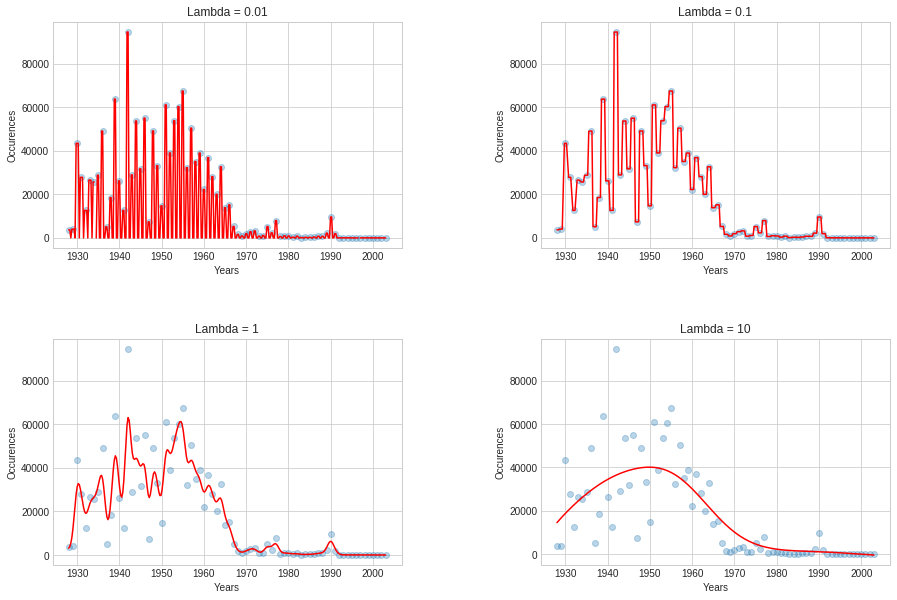

In [0]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

domain = np.linspace(min(MeaslesInCA.year.values), max(MeaslesInCA.year.values), num=300)
countime = 0
for lamda in [0.01, 0.1, 1, 10]:
    prediction = [local_linear_regression(x0, MeaslesInCA.year.values, MeaslesInCA["count"].values, lamda) for x0 in domain]
    countime += 1
    
    plt.subplot(2, 2, countime)
    plt.scatter(MeaslesInCA.year.values, MeaslesInCA["count"].values, alpha=.3)
    plt.plot(domain, prediction, color='red')
    plt.xlabel("Years")
    plt.ylabel("Occurences")
    plt.title("Lambda = "+ str(lamda))

Interpretaition:

Tuning parameter λ plays a role for each individual observation to refer to other neighbor observations. As λ increases, the kernel will take more neighbor points into consideration. On the contrary, as λ decreases, the kernel will includes fewer observations, and fitting result will not be relevant to other points.  Higher value of tuning parameter λ will cause an extremely smooth fitting curve (underfitting). Also, a small value of λ doesn't work well and lead to overfitting. 

#### Conclusion- quesiton 2(c)
It's obvious that the occurrences of measles in California is high before 1970s, and the curve almost converges to 0 occurrence after 1970s. As the explanation of role of λ before, we can observe that the curves represent individual observation (x-axis) in top left and top right plots. In these plots, we can't see any time-series trend for the occurence of Measles. However, in bottom left plot, because each observation refers to its neighborhoods with proper number, we can obtain a smooth curve with the trend of occurrence of Measles in time-series. But, in the bottom right plot, each observation look over too many its neighborhoods that causes a flat curve with higher values of residauls. The most significant difference between bottom left and bottom right plot is that bottom right one shows Measels happened frequently around 1950s. However, bottom left one has an opposite viewpoint that Measels exactly decreased in 1950, and the climax happened in 1942 and 1955.